In [ ]:
#@title Import packeges
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.svm import SVC

In [ ]:
#@title Import dataset
Heartdata=pd.read_csv('/Heart.csv')
X=Heartdata.iloc[:,:-1] #input features
y=Heartdata.iloc[:,-1] #output(last column)
print(Heartdata.shape) #print number of rows,columns in dataset
print(Heartdata.columns)

(303, 16)
Index(['Id', 'Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs', 'RestECG',
       'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'AHD', 'Target'],
      dtype='object')


In [ ]:
#show sample of dataset
Heartdata.head()

,Id,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD,Target
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0,0,0,1
1,2,67,1,2,160,286,0,2,108,1,1.5,2,3,1,1,1
2,3,67,1,2,120,229,0,2,129,1,2.6,2,2,2,1,1
3,4,37,1,3,130,250,0,0,187,0,3.5,3,0,1,0,1
4,5,41,0,0,130,204,0,2,172,0,1.4,1,0,1,0,1


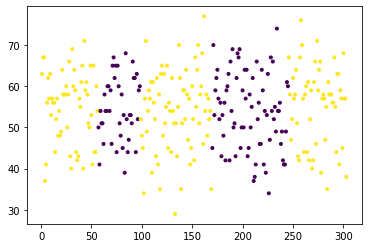

In [ ]:
#@title Explore the data to figure out what they look like
#Show unclassified data
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, marker='.')
plt.show()

In [ ]:
#@title Split the data into attributes (training) and labels (testing)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0) #split data with 0.25% testing , 0.75% training

In [ ]:
#@title Default title text
from sklearn.preprocessing import StandardScaler
# put features in range(0:1 or -1:1) to speed up training and for much accuracy
SC= StandardScaler() 
x_train=SC.fit_transform(x_train)
x_test=SC.transform(x_test)

In [ ]:
#@title Train the SVM algorithm
'''
sklearn.svm.SVC(c=1,kernel='rbf', degree=3, gamma='scale', 
                coef0=0.0, shrinking=True, probability=False,tol=0.001, cache_size=200, class_weight=None, 
                verbose=False, max_iter=-1, decision_function_shape='ovr', random_state=None)
'''
#define the model
classifier=SVC(kernel='rbf',random_state=0) # kernel='rbf' as decision boundry will be not straight line
#train the model
classifier.fit(x_train,y_train)
print("SVCModel train score is: ",classifier.score(x_train,y_train))
print("SVCModel test score is: ",classifier.score(x_test,y_test))

SVCModel train score is:  0.8281938325991189
SVCModel test score is:  0.618421052631579


In [ ]:
#@title Make some predictions
y_pred=classifier.predict(x_test)
print("predicted value for SVCModel is: ",y_pred[:10])

predicted value for SVCModel is:  [1 1 0 0 1 1 1 0 1 0]


In [ ]:
#@title Calculate Confusion Matrix
from sklearn.metrics import confusion_matrix
#calculate the confusion matrix to test the accuracy of prediction
cm=confusion_matrix(y_test,y_pred) 
#if main diagonal(TN,TP) has high values that means there is high accuracy 
print('Confuison Matrix is: \n', cm)

Confuison Matrix is: 
 [[ 8 23]
 [ 6 39]]


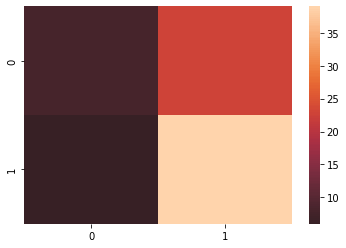

In [ ]:
#@title plot the confusion matrix
import seaborn as sns
sns.heatmap(cm,center=True) #center: colour map
plt.show()

In [ ]:
#@title Evaluate the results of the algorithm
'''while trying different values I discovered that:
rbf better than poly & sigmoid in accuracy
gamma="scale" is the best in accuracy
we trying to get best accuracy and avoid overfitting & underfitting'''